### **JAHANVI KHAMBALKAR**
### ** TFS GRIP Jan'21**
### **DATA SCIENCE AND BUSINESS ANALYTICS (Internship)**

### **TASK : 1** 
**Prediction using Supervised ML**
* Objective : Predict the percentage of an student based on number of study hours.

**Importing Libraries**

In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sb

**Loading the dataset**

In [7]:
student_info = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

In [8]:
student_info.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [9]:
student_info.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [10]:
student_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


**Using seaborn to create a joinplot to compare Hours and Score columns**

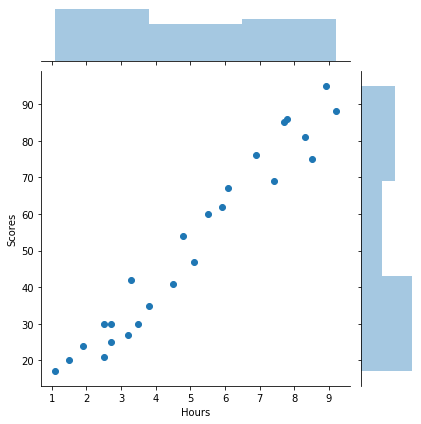

In [11]:
sb.jointplot(x='Hours', y='Scores', data=student_info)

**Checking if the Scores and Hours are corelated or not**

In [12]:
student_info[['Hours','Scores']].corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


* Correlated

**Plotting the 2D hex bin plot**

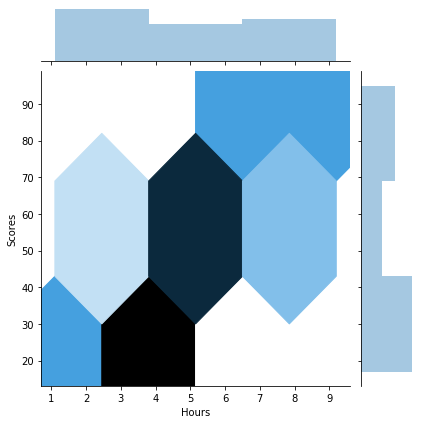

In [13]:
sb.jointplot(x='Hours', y='Scores', kind='hex', data=student_info)

**Creating a linear model plot**

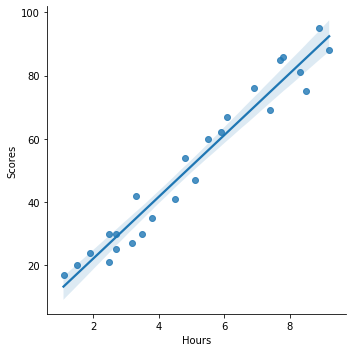

In [14]:
sb.lmplot(x='Hours', y='Scores', data=student_info)

### **Training and Testing Data**

**Setting a variable X equal to "Hours" of the student_info and a variable y equal to the "Score" column.**

In [15]:
y = student_info['Scores']

In [18]:
X = student_info['Hours']

**Using model_selection.train_test_split from sklearn to split the data into training and tests**

In [19]:
from sklearn.model_selection import train_test_split

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)


### **Training the Model**

In [70]:
from sklearn.linear_model import LinearRegression

**Create an instance of a LinearRegression() model**

In [71]:
LRmodel = LinearRegression()

**Train/fit LRmodel on the training set**

In [72]:
LRmodel.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Printing out the coeeficients of the model**

In [73]:
print('Coeffients: \n', LRmodel.coef_)

Coeffients: 
 [[9.82951682]]


### **Predicting the Test Data**

In [74]:
predictions = LRmodel.predict(X_test)

** Creating a scatterplot of the real test values versus the predicted values**

Text(0, 0.5, 'Predicted Y')

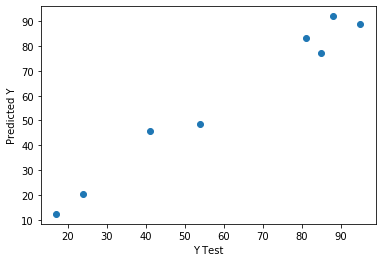

In [75]:
plt.scatter(y_test, predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

### **Evaluating the Model**

In [76]:
# calculate these metrics by hand
from sklearn import metrics
from sklearn.metrics import r2_score
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('r2_score:', r2_score(y_test, predictions)*100, "%")

RMSE: 5.0306943851828505
r2_score: 96.93881290503855 %


** As we know if r2 score->1 the best accuracy we can get. Here the r2 score is 0.9695 means 96.93%. It indicates this model is quit good enough.** 

### **Model Deployment**

** What will be predicted score if a student studies for 9.25 hours/day ?**

In [77]:
study_hour = pd.DataFrame(data={9.25}, columns=['Hours'])
student_score = LRmodel.predict(study_hour)

In [78]:
student_score

array([[92.47897899]])

### **Result**

**If a student study 9.25 hour/day the as per our prediction by the model he would get 92.47% **